In [ ]:
pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
pip install webdriver_manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.5.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from re import S
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from time import sleep
import datetime

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency 
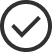

In [ ]:
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)
driver.get("https://www.website.com")
print(driver.page_source)  # results

In [ ]:
tz_hanoi = datetime.timezone(datetime.timedelta(hours=7))
dt2 = datetime.datetime.now(tz_hanoi)
date = dt2.strftime("%d-%m-%Y")
time = dt2.strftime("%H:%M:%S")
print(date, time)

21-10-2022 17:14:00


In [ ]:
driver.get('https://shopee.vn/huawei_flagship_store/')
driver.maximize_window()    
sleep(5)

#Tìm tất cả sản phẩm
view_all_products = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[2]/div/div/div/div[2]/div/div[2]/div/div/div/a[2]")
view_all_products.click()
sleep(2)

html = driver.page_source
soup = BeautifulSoup(html,'lxml')

In [ ]:
result = soup.find_all("div", class_="_3ZU4Xu")
result

[<div class="_3ZU4Xu"><div style="pointer-events: none;"><div class="nHUlre _2CaWwM"><img class="yFkmMY _1xNi9a"/><div class="_1an6b6"><div class="shopee-image-placeholder"><svg class="stardust-icon stardust-icon-shopee icon-shopee-tiny" enable-background="new 0 0 54 61" role="img" viewbox="0 0 54 61"><path d="M35.67,44.95 C35.34,47.70 33.67,49.91 31.09,51.01 C29.65,51.63 27.72,51.96 26.19,51.85 C23.81,51.76 21.57,51.18 19.50,50.12 C18.77,49.74 17.67,48.99 16.82,48.28 C16.61,48.10 16.58,47.99 16.73,47.78 C16.80,47.67 16.94,47.46 17.25,47.01 C17.71,46.34 17.76,46.26 17.81,46.18 C17.96,45.96 18.19,45.94 18.42,46.12 C18.45,46.14 18.45,46.14 18.47,46.16 C18.50,46.19 18.50,46.19 18.59,46.26 C18.68,46.33 18.74,46.37 18.76,46.39 C20.99,48.13 23.58,49.13 26.20,49.24 C29.84,49.19 32.46,47.55 32.93,45.03 C33.44,42.27 31.27,39.88 27.02,38.54 C25.69,38.13 22.33,36.78 21.71,36.42 C18.80,34.71 17.44,32.47 17.64,29.71 C17.93,25.88 21.49,23.03 25.98,23.01 C27.98,23.01 29.99,23.42 31.91,24.23 C32.60,24

In [ ]:
def crawlData():
  for t in result:
    n_products = t.find("div", class_ = "_3Gla5X _2j2K92 _3j20V6").text
    p_products = t.find("span", class_ = "_3TJGx5").text
    c_products = t.find("div", class_="_3UeJ1q").text
    
    with open('Huawei.csv', 'a+') as f:
      writer = csv.writer(f)
      writer.writerow([date + " " + time,n_products,p_products,c_products])
    

In [ ]:
next_view_all_products = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[2]/div/div/div/div[2]/div/div[3]/div[2]/div[2]/div/div[1]/div[2]/button[2]")
next_view_all_products.click()
sleep(2)

html = driver.page_source
soup = BeautifulSoup(html,'lxml')
result = soup.find_all("div", class_="_3DGyGY")
crawlData()

In [ ]:
#Cào buổi sáng thì thực thi ô này
df_m = pd.read_csv('Huawei.csv', names = ['Thời gian sáng','Tên sản phẩm','Giá','Số lượng đã bán buổi sáng'], dtype = 'string')
df_m

,Thời gian sáng,Tên sản phẩm,Giá,Số lượng đã bán buổi sáng
0,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,985.000,Đã bán 3k
1,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,"Đã bán 2,5k"
2,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690.000,"Đã bán 8,1k"
3,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,"Đã bán 5,5k"
4,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,"Đã bán 1,4k"
...,...,...,...,...
217,21-10-2022 17:14:00,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990.000,Đã bán 11
218,21-10-2022 17:14:00,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999.000,Đã bán 6
219,21-10-2022 17:14:00,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...,1.190.000,"Đã bán 2,4k"
220,21-10-2022 17:14:00,Cáp dữ liệu HUAWEI Type-C Data Cable,129.000,Đã bán 32


In [ ]:
#Cào buổi tối thì thực thi ô này
df_n = pd.read_csv('Huawei.csv', names = ['Thời gian tối','Tên sản phẩm','Giá','Số lượng đã bán buổi tối'], dtype = 'string')
df_n

,Thời gian tối,Tên sản phẩm,Giá,Số lượng đã bán buổi tối
0,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,985.000,Đã bán 3k
1,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,"Đã bán 2,5k"
2,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690.000,"Đã bán 8,1k"
3,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,"Đã bán 5,5k"
4,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,"Đã bán 1,4k"
...,...,...,...,...
217,21-10-2022 17:14:00,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990.000,Đã bán 11
218,21-10-2022 17:14:00,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999.000,Đã bán 6
219,21-10-2022 17:14:00,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...,1.190.000,"Đã bán 2,4k"
220,21-10-2022 17:14:00,Cáp dữ liệu HUAWEI Type-C Data Cable,129.000,Đã bán 32


In [ ]:
df_m.info

<bound method DataFrame.info of           Thời gian sáng                                       Tên sản phẩm  \
0    21-10-2022 15:55:11  [Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...   
1    21-10-2022 15:55:11  [Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...   
2    21-10-2022 15:55:11  [Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...   
3    21-10-2022 15:55:11  [Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...   
4    21-10-2022 15:55:11  [Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...   
..                   ...                                                ...   
217  21-10-2022 17:14:00  Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...   
218  21-10-2022 17:14:00  Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...   
219  21-10-2022 17:14:00  [Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...   
220  21-10-2022 17:14:00               Cáp dữ liệu HUAWEI Type-C Data Cable   
221  21-10-2022 17:14:00  Đồng hồ thông minh HUAWEI WATCH GT 3 SE | Tập ...   

           Giá Số l

In [ ]:
df_n.info

<bound method DataFrame.info of            Thời gian tối                                       Tên sản phẩm  \
0    21-10-2022 15:55:11  [Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...   
1    21-10-2022 15:55:11  [Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...   
2    21-10-2022 15:55:11  [Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...   
3    21-10-2022 15:55:11  [Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...   
4    21-10-2022 15:55:11  [Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...   
..                   ...                                                ...   
217  21-10-2022 17:14:00  Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...   
218  21-10-2022 17:14:00  Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...   
219  21-10-2022 17:14:00  [Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...   
220  21-10-2022 17:14:00               Cáp dữ liệu HUAWEI Type-C Data Cable   
221  21-10-2022 17:14:00  Đồng hồ thông minh HUAWEI WATCH GT 3 SE | Tập ...   

           Giá Số l

In [ ]:
print(df_m.isna().sum())
print('--------------')
df_n.isna().sum()

Thời gian sáng               0
Tên sản phẩm                 0
Giá                          0
Số lượng đã bán buổi sáng    6
dtype: int64
--------------


Thời gian tối               0
Tên sản phẩm                0
Giá                         0
Số lượng đã bán buổi tối    6
dtype: int64

In [ ]:
df_m['Số lượng đã bán buổi sáng'] = df_m['Số lượng đã bán buổi sáng'].replace(np.nan, '0')
df_m

,Thời gian sáng,Tên sản phẩm,Giá,Số lượng đã bán buổi sáng
0,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,985.000,Đã bán 3k
1,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,"Đã bán 2,5k"
2,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690.000,"Đã bán 8,1k"
3,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,"Đã bán 5,5k"
4,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,"Đã bán 1,4k"
...,...,...,...,...
217,21-10-2022 17:14:00,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990.000,Đã bán 11
218,21-10-2022 17:14:00,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999.000,Đã bán 6
219,21-10-2022 17:14:00,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...,1.190.000,"Đã bán 2,4k"
220,21-10-2022 17:14:00,Cáp dữ liệu HUAWEI Type-C Data Cable,129.000,Đã bán 32


In [ ]:
df_n['Số lượng đã bán buổi tối'] = df_n['Số lượng đã bán buổi tối'].replace(np.nan, '0')
df_n

,Thời gian tối,Tên sản phẩm,Giá,Số lượng đã bán buổi tối
0,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,985.000,Đã bán 3k
1,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,"Đã bán 2,5k"
2,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690.000,"Đã bán 8,1k"
3,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,"Đã bán 5,5k"
4,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,"Đã bán 1,4k"
...,...,...,...,...
217,21-10-2022 17:14:00,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990.000,Đã bán 11
218,21-10-2022 17:14:00,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999.000,Đã bán 6
219,21-10-2022 17:14:00,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...,1.190.000,"Đã bán 2,4k"
220,21-10-2022 17:14:00,Cáp dữ liệu HUAWEI Type-C Data Cable,129.000,Đã bán 32


In [ ]:
for i in range(len(df_m)):
  c = df_m['Số lượng đã bán buổi sáng'][i]
  if ',' in c:
    c = df_m['Số lượng đã bán buổi sáng'][i].replace(',','').replace('k','00')
  else:
    c = df_m['Số lượng đã bán buổi sáng'][i].replace('k','000')
  df_m['Số lượng đã bán buổi sáng'][i] = c.split()[-1]
df_m

,Thời gian sáng,Tên sản phẩm,Giá,Số lượng đã bán buổi sáng
0,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,985.000,3000
1,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,2500
2,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690.000,8100
3,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,5500
4,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,1400
...,...,...,...,...
217,21-10-2022 17:14:00,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990.000,11
218,21-10-2022 17:14:00,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999.000,6
219,21-10-2022 17:14:00,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...,1.190.000,2400
220,21-10-2022 17:14:00,Cáp dữ liệu HUAWEI Type-C Data Cable,129.000,32


In [ ]:
for i in range(len(df_n)):
  c = df_n['Số lượng đã bán buổi tối'][i]
  if ',' in c:
    c = df_n['Số lượng đã bán buổi tối'][i].replace(',','').replace('k','00')
  else:
    c = df_n['Số lượng đã bán buổi tối'][i].replace('k','000')
  df_n['Số lượng đã bán buổi tối'][i] = c.split()[-1]
df_n

,Thời gian tối,Tên sản phẩm,Giá,Số lượng đã bán buổi tối
0,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,985.000,3000
1,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,2500
2,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690.000,8100
3,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,5500
4,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,1400
...,...,...,...,...
217,21-10-2022 17:14:00,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990.000,11
218,21-10-2022 17:14:00,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999.000,6
219,21-10-2022 17:14:00,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...,1.190.000,2400
220,21-10-2022 17:14:00,Cáp dữ liệu HUAWEI Type-C Data Cable,129.000,32


In [ ]:
df_m = df_m.drop_duplicates(subset='Tên sản phẩm', keep="first").reset_index(drop=True)
df_m

,Thời gian sáng,Tên sản phẩm,Giá,Số lượng đã bán buổi sáng
0,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,985.000,3000
1,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,2500
2,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690.000,8100
3,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,5500
4,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,1400
5,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,7.990.000,237
6,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe HUAWEI Fr...,890.000,1100
7,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...,1.190.000,2400
8,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Tai nghe Bluetooth ...,4.490.000,27
9,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Tai Nghe Bluetooth...,1.990.000,182


In [ ]:
df_n = df_n.drop_duplicates(subset='Tên sản phẩm', keep="first").reset_index(drop=True)
df_n

,Thời gian tối,Tên sản phẩm,Giá,Số lượng đã bán buổi tối
0,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,985.000,3000
1,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,2500
2,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690.000,8100
3,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,5500
4,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,1400
5,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,7.990.000,237
6,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe HUAWEI Fr...,890.000,1100
7,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Tai nghe Bluetooth...,1.190.000,2400
8,21-10-2022 15:55:11,[Mã ELHW3 giảm 3% đơn 2TR] Tai nghe Bluetooth ...,4.490.000,27
9,21-10-2022 15:55:11,[Mã ELHW5 giảm 5% đơn 500K] Tai Nghe Bluetooth...,1.990.000,182


In [ ]:
#Cào buổi sáng thì mở và ghi vào file morning.csv
df_m1 = pd.read_csv('morning.csv',encoding="utf-8")
morning = pd.concat([df_m, df_m1])
morning.to_csv('morning.csv',index=False)
morning.dropna()

,Thời gian sáng,Tên sản phẩm,Giá,Số lượng đã bán buổi sáng
0,21-10-2022 05:48:54,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,990,3000
1,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,2560
2,21-10-2022 05:48:54,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690,8100
3,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,5500
4,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,1400
...,...,...,...,...
168,18-10-2022 07:11:34,[Mã ELHW3 giảm 3% đơn 2TR] Máy Tính Xách Tay H...,22.990.000,32
169,18-10-2022 07:11:34,Bộ Sản Phẩm Huawei (Vòng đeo tay thông minh HU...,1.940.000,525
170,18-10-2022 07:11:34,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990,53
171,18-10-2022 07:11:34,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999,34


In [ ]:
#Cào buổi tối thì mở và ghi vào file evening.csv
df_n1 = pd.read_csv('evening.csv',encoding="utf-8")
evening = pd.concat([df_n, df_n1])
evening.to_csv('evening.csv',index=False)
evening.dropna()

,Thời gian tối,Tên sản phẩm,Giá,Số lượng đã bán buổi tối
0,21-10-2022 15:43:28,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,990,3012
1,21-10-2022 15:43:28,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,2563
2,21-10-2022 15:43:28,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690,8109
3,21-10-2022 15:43:28,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,5503
4,21-10-2022 15:43:28,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,1405
...,...,...,...,...
168,18-10-2022 20:12:34,[Mã ELHW3 giảm 3% đơn 2TR] Máy Tính Xách Tay H...,22.990.000,42
169,18-10-2022 20:12:34,Bộ Sản Phẩm Huawei (Vòng đeo tay thông minh HU...,1.940.000,537
170,18-10-2022 20:12:34,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990,73
171,18-10-2022 20:12:34,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999,54


In [ ]:
# total = morning.merge(evening, on=['Tên sản phẩm','Giá'],how ='inner')
# total

In [ ]:
total = pd.concat([morning, evening[['Thời gian tối','Số lượng đã bán buổi tối']]], axis=1, join='inner')
total

,Thời gian sáng,Tên sản phẩm,Giá,Số lượng đã bán buổi sáng,Thời gian tối,Số lượng đã bán buổi tối
0,21-10-2022 05:48:54,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,990,3000,21-10-2022 15:43:28,3012
1,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,2560,21-10-2022 15:43:28,2563
2,21-10-2022 05:48:54,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690,8100,21-10-2022 15:43:28,8109
3,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,5500,21-10-2022 15:43:28,5503
4,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,1400,21-10-2022 15:43:28,1405
...,...,...,...,...,...,...
168,18-10-2022 07:11:34,[Mã ELHW3 giảm 3% đơn 2TR] Máy Tính Xách Tay H...,22.990.000,32,18-10-2022 20:12:34,42
169,18-10-2022 07:11:34,Bộ Sản Phẩm Huawei (Vòng đeo tay thông minh HU...,1.940.000,525,18-10-2022 20:12:34,537
170,18-10-2022 07:11:34,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990,53,18-10-2022 20:12:34,73
171,18-10-2022 07:11:34,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999,34,18-10-2022 20:12:34,54


In [ ]:
total['Đã bán trong ngày'] = pd.to_numeric(total['Số lượng đã bán buổi tối'], errors='coerce').fillna(0).astype(int) - pd.to_numeric(total['Số lượng đã bán buổi sáng'], errors='coerce').fillna(0).astype(int)

In [ ]:
total['Đã bán trong ngày']

0      12
1       3
2       9
3       3
4       5
       ..
168    10
169    12
170    20
171    20
172    31
Name: Đã bán trong ngày, Length: 173, dtype: int64

In [ ]:
total

,Thời gian sáng,Tên sản phẩm,Giá,Số lượng đã bán buổi sáng,Thời gian tối,Số lượng đã bán buổi tối,Đã bán trong ngày
0,21-10-2022 05:48:54,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,990,3000,21-10-2022 15:43:28,3012,12
1,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,2560,21-10-2022 15:43:28,2563,3
2,21-10-2022 05:48:54,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690,8100,21-10-2022 15:43:28,8109,9
3,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,5500,21-10-2022 15:43:28,5503,3
4,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,1400,21-10-2022 15:43:28,1405,5
...,...,...,...,...,...,...,...
168,18-10-2022 07:11:34,[Mã ELHW3 giảm 3% đơn 2TR] Máy Tính Xách Tay H...,22.990.000,32,18-10-2022 20:12:34,42,10
169,18-10-2022 07:11:34,Bộ Sản Phẩm Huawei (Vòng đeo tay thông minh HU...,1.940.000,525,18-10-2022 20:12:34,537,12
170,18-10-2022 07:11:34,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990,53,18-10-2022 20:12:34,73,20
171,18-10-2022 07:11:34,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999,34,18-10-2022 20:12:34,54,20


In [ ]:
turnover = total[['Thời gian sáng','Tên sản phẩm','Giá','Đã bán trong ngày']]
turnover.dropna()

,Thời gian sáng,Tên sản phẩm,Giá,Đã bán trong ngày
0,21-10-2022 05:48:54,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,990,12
1,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,3
2,21-10-2022 05:48:54,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690,9
3,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,3
4,21-10-2022 05:48:54,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,5
...,...,...,...,...
168,18-10-2022 07:11:34,[Mã ELHW3 giảm 3% đơn 2TR] Máy Tính Xách Tay H...,22.990.000,10
169,18-10-2022 07:11:34,Bộ Sản Phẩm Huawei (Vòng đeo tay thông minh HU...,1.940.000,12
170,18-10-2022 07:11:34,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990,20
171,18-10-2022 07:11:34,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999,20


In [ ]:
for i in range(len(turnover)):
  c = turnover['Thời gian sáng'][i]
  c = str(c).split()
  turnover['Thời gian sáng'][i] = c[0]
turnover.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Thời gian sáng,Tên sản phẩm,Giá,Đã bán trong ngày
0,21-10-2022,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,990,12
1,21-10-2022,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,3
2,21-10-2022,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690,9
3,21-10-2022,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,3
4,21-10-2022,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,5
...,...,...,...,...
168,18-10-2022,[Mã ELHW3 giảm 3% đơn 2TR] Máy Tính Xách Tay H...,22.990.000,10
169,18-10-2022,Bộ Sản Phẩm Huawei (Vòng đeo tay thông minh HU...,1.940.000,12
170,18-10-2022,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990,20
171,18-10-2022,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999,20


In [ ]:
turnover.columns = ['Ngày','Tên sản phẩm','Giá','Đã bán trong ngày']
turnover = turnover.dropna()
turnover

,Ngày,Tên sản phẩm,Giá,Đã bán trong ngày
0,21-10-2022,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,990,12
1,21-10-2022,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.990.000,3
2,21-10-2022,[Mã ELHW5 giảm 5% đơn 500K] Vòng Đeo Tay Thông...,690,9
3,21-10-2022,[Mã ELHW3 giảm 3% đơn 2TR] Đồng hồ Huawei Watc...,2.990.000,3
4,21-10-2022,[Mã ELHW3 giảm 3% đơn 2TR] Đồng Hồ Thông Minh ...,4.490.000,5
...,...,...,...,...
168,18-10-2022,[Mã ELHW3 giảm 3% đơn 2TR] Máy Tính Xách Tay H...,22.990.000,10
169,18-10-2022,Bộ Sản Phẩm Huawei (Vòng đeo tay thông minh HU...,1.940.000,12
170,18-10-2022,Bộ định tuyến WiFi HUAWEI AX2 | WiFi 6 5GHz hỗ...,990,20
171,18-10-2022,Cáp chuyển đổi HUAWEI MateDock 2 | Tùy chọn kế...,999,20


In [ ]:
for i in range(len(turnover)):
  c = str(turnover['Giá'][i])
  if '.' in c:
    c = str(c).split('.')
    c = "".join(c)
    turnover['Giá'][i] = int(c)
  else:
    turnover['Giá'][i] = int(c)*1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
days = turnover['Ngày'].unique()
days[:] = days[::-1]
days

array(['18-10-2022', '19-10-2022', '20-10-2022', '21-10-2022'],
      dtype=object)

In [ ]:
turnover['Đã bán trong ngày'].unique()

array([12,  3,  9,  5, 53,  2,  4,  0,  1, 22, 18,  6, 24, 16, 11,  7, 21,
        8, 28, 14, 76, 19, 26, 13, 20, 15, 29, 17, 31, 10, 30])

In [ ]:
turnover['Giá'].unique()

array([990000, 4990000, 690000, 2990000, 4490000, 7990000, 890000,
       1990000, 5940000, 3690000, 6490000, 9990000, 2690000, 14990000,
       14985000, 17990000, 15990000, 19990000, 11990000, 649000, 5490000,
       6990000, 8990000, 99000, 199000, 1699000, 1590000, 799000, 2985000,
       499000, 4690000, 22990000, 1940000, 999000, 129000, 9999999,
       3990000], dtype=object)

In [ ]:
turnover['Đã bán trong ngày'] = turnover['Đã bán trong ngày'].astype('int32')

In [ ]:
s0 = s1 = s2 = s3 = 0
for i in range(len(turnover)):
  if(turnover['Ngày'][i] == days[0]):
    s0 += int(turnover['Giá'][i] * turnover['Đã bán trong ngày'][i])
  if(turnover['Ngày'][i] == days[1]):
    s1 += int(turnover['Giá'][i] * turnover['Đã bán trong ngày'][i])
  if(turnover['Ngày'][i] == days[2]):
    s2 += int(turnover['Giá'][i] * turnover['Đã bán trong ngày'][i])
  if(turnover['Ngày'][i] == days[3]):
    s3 += int(turnover['Giá'][i] * turnover['Đã bán trong ngày'][i])
price = [s0,s1,s2,s3]
price

[953993000, 2115065000, 554675000, 1347297000]

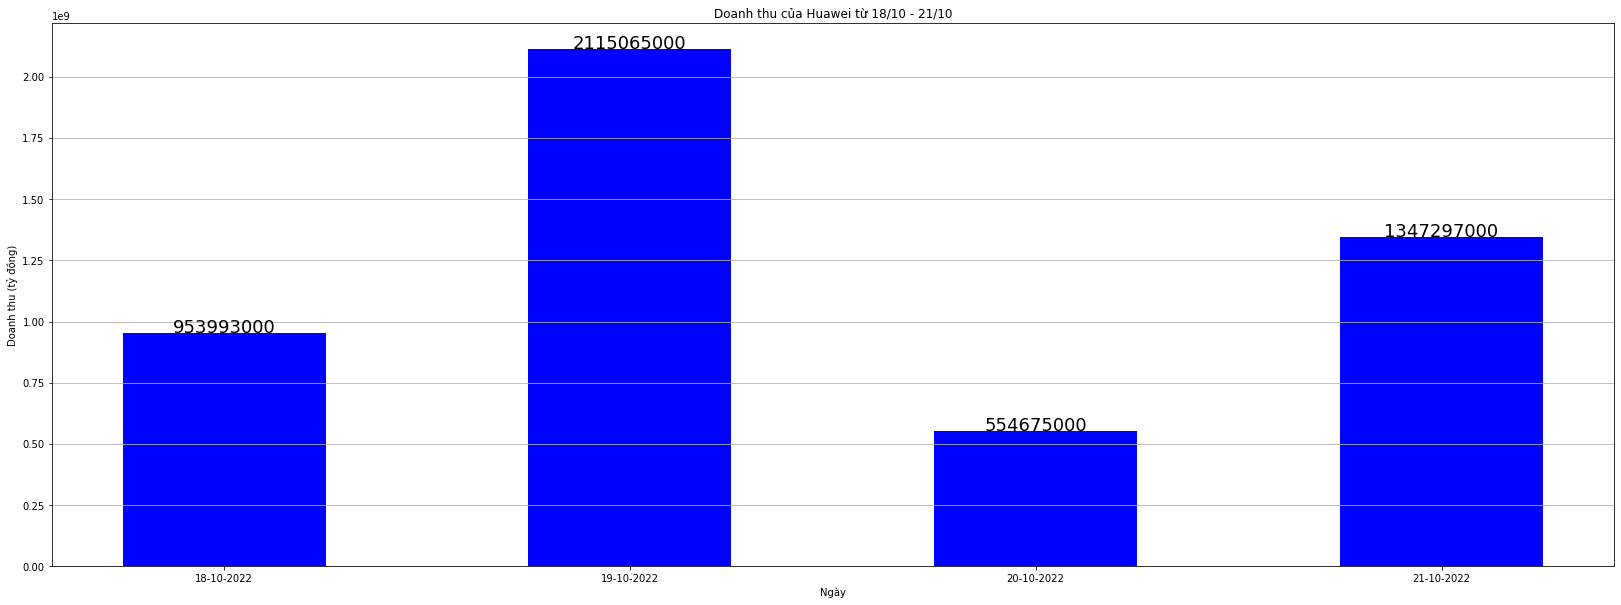

In [ ]:
courses = list(days)
values = list(price)

def addlabels(x,y,s):
  for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = s, fontsize=18)

fig = plt.figure(figsize = (28, 10))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.5)
addlabels(courses, values,'center')
plt.xlabel("Ngày")
plt.ylabel("Doanh thu (tỷ đồng)")
plt.title("Doanh thu của Huawei từ 18/10 - 21/10")
plt.grid(axis='y')
plt.show()

In [ ]:
# Trung bình mỗi ngày
means_day = sum(price)/4
means_day

1242757500.0

In [ ]:
#Dự đoán danh thu trong 1 tuần
predict_week = means_day*7
predict_week

8699302500.0